## AI Driven Circular Economy Tracker

In a circular economy, the goal is to use resources efficiently — that means using fewer raw materials, generating less waste, and reusing what we already have.

AI (Artificial Intelligence) helps by making data-driven decisions about how resources (like energy, water, materials, or products) are used, shared, and recycled.


## AI for Smart Resource Management

The goal of this project is to develop an AI-powered smart resource management system that predicts and monitors key sustainability metrics in a circular economy framework.
Using advanced Machine Learning (ML) and data analytics, the system identifies facilities with excessive waste, forecasts recycled material usage, and calculates a circularity KPI to support data-driven sustainability decisions.

### ML Problem Statement :

Problem: Predict the quantity of recycled materials (recycled_material_kg) used by each industrial facility, based on production volume, resource consumption, and operational parameters.

Objective: Help manufacturing plants forecast recycling needs, optimize supply chains, and improve material circularity.

Regression Target Column: recycled_material_kg  - the amount of recycled material (in kilograms) used in production at a facility on a given date. (Predict future recycling trends).
It’s a key sustainability indicator, showing how much of total material input is reused instead of being taken from virgin sources.

Classification Target Column : high_waste_flag - A binary classification label that flags whether a facility had unusually high waste on that day. (1 if waste > 75th percentile, else 0 - Identify high-waste facilities)

KPI Metric Target Column: circularity_score - This produces a continuous value between 0 and 1, representing how circular a facility’s material usage is. (Sustainability benchmarking)


### Methodology Workflow :

#### Step 1 – Data Understanding & Preprocessing :

Handled missing values and ensured datatype consistency

Normalized large-scale variables like raw_material_kg and waste_kg

Removed anomalies using IQR-based outlier detection

#### Step 2 – Exploratory Data Analysis (EDA) :

Identified top waste-producing facilities and sectors

Analyzed correlations between energy, production volume, and recycling efficiency

Visualized trends in circularity by region and sector

Used histograms, boxplots, and heatmaps for insights

### Step 3 – Feature Engineering :

Created derived metrics:

material_efficiency_ratio = recycled_material_kg / raw_material_kg

energy_per_unit = energy_kwh / production_volume_units

downtime_ratio = machine_downtime_min / 1440

Encoded categorical features

### Step 4 – Model Building : 

Regression Model: Predicted recycled_material_kg using Linear Regression, Random Forest, and XGBoost

Classification Model: Predicted high_waste_flag using Logistic Regression and Random Forest Classifier

Feature Selection: Recursive Feature Elimination (RFE) used to refine inputs

### Step 5 – Model Evaluation :

Regression Metrics: R², RMSE, MAE, MSE

Classification Metrics: Accuracy, Precision,Confusion Metrics, Recall, F1-score, ROC-AUC

KPI Dashboard: Circularity trend visualized using Power BI

## Python Libraries 

In [45]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Data Understanding & Preprocessing

In [46]:
df = pd.read_csv("circular_economy_dataset.csv")
df

,record_id,facility_id,region,sector,date,product_type,production_volume_units,raw_material_kg,recycled_material_kg,waste_kg,energy_kwh,water_liters,machine_downtime_min,recycling_partner_id,material_recovery_rate,circularity_score,high_waste_flag
0,1,F103,Central,Manufacturing,2021-01-01 00:00:00,D,465,37158.689666,327.993867,796.218119,1104.530248,52543.553197,252,P010,0.477265,0.008750,0
1,2,F093,Central,FoodProcessing,2021-01-01 01:00:00,B,8563,38696.786139,18745.877072,186.479251,4756.519996,69309.583492,194,P025,0.323071,0.326341,0
2,3,F015,Central,Automotive,2021-01-01 02:00:00,A,639,14004.562775,167.887756,3938.828066,4523.040420,18261.908937,470,P015,0.747595,0.011846,1
3,4,F107,North,Textiles,2021-01-01 03:00:00,C,7739,1235.452834,18817.172636,4515.355530,3772.219308,23275.832404,242,P003,0.642898,0.938389,1
4,5,F072,East,Manufacturing,2021-01-01 04:00:00,D,8512,25337.578331,10184.658514,3193.442861,5725.034528,33311.281041,13,P038,0.770118,0.286712,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119997,119996,F085,Central,FoodProcessing,2034-09-09 19:00:00,C,9461,34438.630730,9694.401086,3419.054118,9923.176865,85084.881118,191,P036,0.772482,0.219663,0
119998,119997,F064,West,Textiles,2034-09-09 20:00:00,B,2877,7237.806828,437.801570,753.284931,9377.988205,48155.165096,42,P007,0.178297,0.057038,0
119999,119998,F008,South,FoodProcessing,2034-09-09 21:00:00,B,4124,10290.508925,19653.040037,4964.124293,1612.387005,88661.667884,109,P020,0.226163,0.656336,1
120000,119999,F035,North,FoodProcessing,2034-09-09 22:00:00,A,5289,26585.062424,19489.647774,1961.407296,3396.678312,26881.971699,156,P048,0.343119,0.423001,0


In [47]:
df.shape

(120002, 17)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120002 entries, 0 to 120001
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   record_id                120002 non-null  int64  
 1   facility_id              120002 non-null  object 
 2   region                   120002 non-null  object 
 3   sector                   120000 non-null  object 
 4   date                     120002 non-null  object 
 5   product_type             120002 non-null  object 
 6   production_volume_units  120002 non-null  int64  
 7   raw_material_kg          120001 non-null  float64
 8   recycled_material_kg     120001 non-null  float64
 9   waste_kg                 120002 non-null  float64
 10  energy_kwh               120002 non-null  float64
 11  water_liters             120002 non-null  float64
 12  machine_downtime_min     120002 non-null  int64  
 13  recycling_partner_id     120002 non-null  object 
 14  mate

In [49]:
df.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
record_id,120002.0,NaN,NaN,NaN,59999.500542,34641.736901,1.0,29999.25,59999.5,89999.75,120000.0
facility_id,120002,150,F143,873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,120002,5,South,24148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sector,120000,5,Automotive,24175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,120002,120000,2021-01-02 07:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_type,120002,4,C,30246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
production_volume_units,120002.0,NaN,NaN,NaN,5063.917818,2856.164482,100.0,2593.0,5073.0,7534.0,9999.0
raw_material_kg,120001.0,NaN,NaN,NaN,25273.663842,14269.54166,500.025683,12917.481073,25275.428292,37603.366116,49999.916586
recycled_material_kg,120001.0,NaN,NaN,NaN,10054.732401,5744.621639,100.104424,5099.981203,10038.553436,15043.999847,19999.899104
waste_kg,120002.0,NaN,NaN,NaN,2506.074365,1439.627817,10.0665,1260.150118,2503.301709,3751.104031,4999.964158


### Handling Duplicates

In [50]:
df.duplicated().sum()

2

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.shape

(120000, 17)

### Handling Missing Values

In [53]:
df.isnull().sum()

record_id                  0
facility_id                0
region                     0
sector                     2
date                       0
product_type               0
production_volume_units    0
raw_material_kg            1
recycled_material_kg       1
waste_kg                   0
energy_kwh                 0
water_liters               0
machine_downtime_min       0
recycling_partner_id       0
material_recovery_rate     1
circularity_score          0
high_waste_flag            0
dtype: int64

There is Missing values in the columns - sector, raw_material_kg, recycled_material_kg, material_recovery_rate

In [54]:
df["sector"].value_counts()

sector
Automotive        24175
Electronics       24142
Manufacturing     23986
FoodProcessing    23950
Textiles          23745
Name: count, dtype: int64

In [55]:
df["sector"].unique()

array(['Manufacturing', 'FoodProcessing', 'Automotive', 'Textiles',
       'Electronics', nan], dtype=object)

As it is a categorical column with 5 unique values , So that we can fill the Missing cell with the most repeated Name, which is "Automotive"

In [56]:
df["sector"] = df["sector"].fillna(df["sector"].mode)

In [57]:
df["raw_material_kg"].value_counts()

raw_material_kg
37158.689666    1
25765.051670    1
20962.358259    1
15075.496925    1
20019.695891    1
               ..
27757.422527    1
22735.469019    1
35365.582339    1
30914.031649    1
999.657843      1
Name: count, Length: 119999, dtype: int64

Other 3 columns with missing values are Numeric Values, So that we can fill it with Mean Value.

In [58]:
df["raw_material_kg"] = df["raw_material_kg"].fillna(df["raw_material_kg"].mean())
df["recycled_material_kg"] = df["recycled_material_kg"].fillna(df["recycled_material_kg"].mean())
df["material_recovery_rate"] =df["material_recovery_rate"].fillna(df["material_recovery_rate"].mean())

In [59]:
df.isnull().sum()

record_id                  0
facility_id                0
region                     0
sector                     0
date                       0
product_type               0
production_volume_units    0
raw_material_kg            0
recycled_material_kg       0
waste_kg                   0
energy_kwh                 0
water_liters               0
machine_downtime_min       0
recycling_partner_id       0
material_recovery_rate     0
circularity_score          0
high_waste_flag            0
dtype: int64

### Remove irrelavent columns

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 120001
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   record_id                120000 non-null  int64  
 1   facility_id              120000 non-null  object 
 2   region                   120000 non-null  object 
 3   sector                   120000 non-null  object 
 4   date                     120000 non-null  object 
 5   product_type             120000 non-null  object 
 6   production_volume_units  120000 non-null  int64  
 7   raw_material_kg          120000 non-null  float64
 8   recycled_material_kg     120000 non-null  float64
 9   waste_kg                 120000 non-null  float64
 10  energy_kwh               120000 non-null  float64
 11  water_liters             120000 non-null  float64
 12  machine_downtime_min     120000 non-null  int64  
 13  recycling_partner_id     120000 non-null  object 
 14  material_

Columns : "date","record_id","facility_id","recycling_partner_id" are not relevant for predicting our target.
These Columns donot carry any valuable information for training the Model, So we will drop these columns.

In [61]:
df.drop(columns=["date","record_id","facility_id","recycling_partner_id"],axis=1,inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120000 entries, 0 to 120001
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region                   120000 non-null  object 
 1   sector                   120000 non-null  object 
 2   product_type             120000 non-null  object 
 3   production_volume_units  120000 non-null  int64  
 4   raw_material_kg          120000 non-null  float64
 5   recycled_material_kg     120000 non-null  float64
 6   waste_kg                 120000 non-null  float64
 7   energy_kwh               120000 non-null  float64
 8   water_liters             120000 non-null  float64
 9   machine_downtime_min     120000 non-null  int64  
 10  material_recovery_rate   120000 non-null  float64
 11  circularity_score        120000 non-null  float64
 12  high_waste_flag          120000 non-null  int64  
dtypes: float64(7), int64(3), object(3)
memory usage: 12.8+ MB


### Visualization

Distribution of Recycled Material (Regression Target)

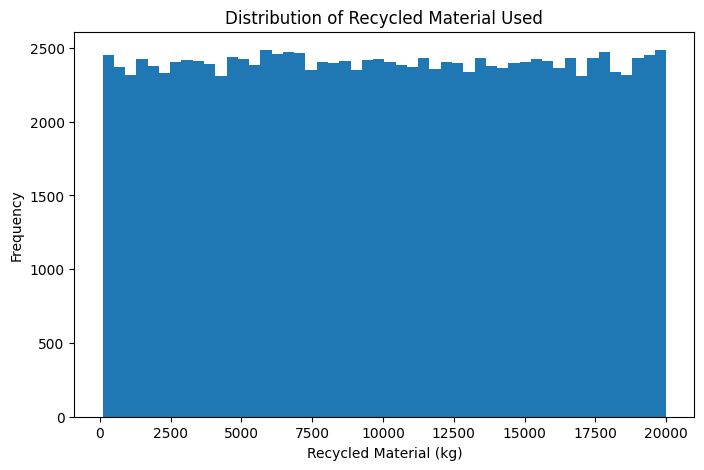

In [63]:
plt.figure(figsize=(8,5))
plt.hist(df['recycled_material_kg'], bins=50)
plt.xlabel("Recycled Material (kg)")
plt.ylabel("Frequency")
plt.title("Distribution of Recycled Material Used")
plt.show()

Circularity Score Distribution (KPI Target)

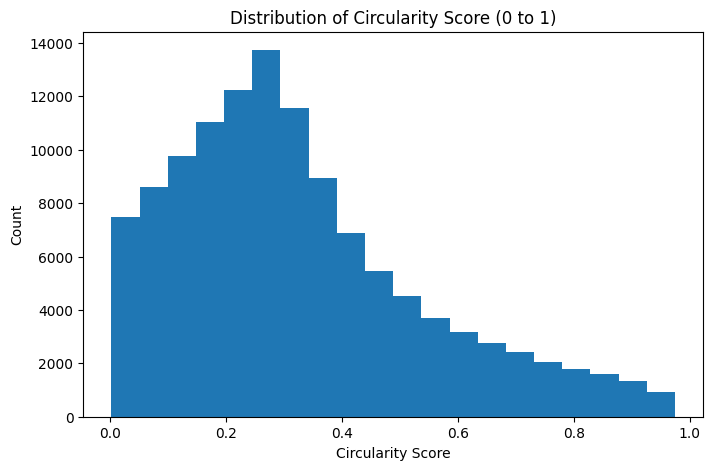

In [64]:
plt.figure(figsize=(8,5))
plt.hist(df['circularity_score'], bins=20)
plt.xlabel("Circularity Score")
plt.ylabel("Count")
plt.title("Distribution of Circularity Score (0 to 1)")
plt.show()

Classification Target – High Waste Flag Counts

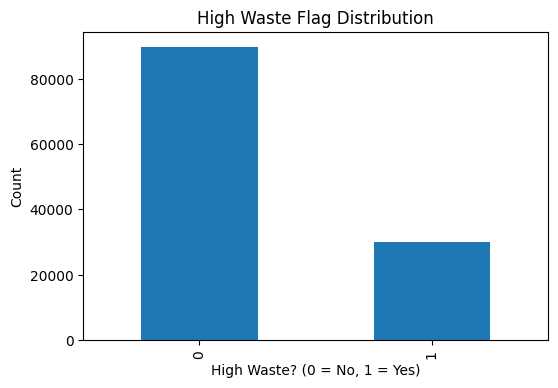

In [66]:
plt.figure(figsize=(6,4))
df['high_waste_flag'].value_counts().plot(kind='bar')
plt.xlabel("High Waste? (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("High Waste Flag Distribution")
plt.show()